In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
advertising = pd.read_csv('../00-data/advertising.csv', usecols=[0,3]) #names=['Television', 'Sales']

advertising

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


l'algoritmo della regressione funziona in questa maniera:
* Inizializziamo il sistema con una funzione casuale (in questo caso una retta ma può essere anche un piano, iperpiano o qualsiasi funzione polinomiale)
* calcoliamo l'errore (l'errore più comune è il MSE pari alla media di tutte le distanze al quadrato tra il punto predetto)
* calcoliamo il gradiente dell'errore
* moltiplichiamo il valore del gradiente in quel punto per un parametro (learning rate), da quello aggiorneremo i parametri di pesi e bias e creeremo una nuova retta più precisa
* ripetiamo l'algoritmo finche non abbiamo raggiunto un determinato numero di ripetizioni o il risultato non si stabilizza (se presente early stop)

In [3]:
# in questa funzione inizializzo la retta con valori casuali, il primo passo per la regressione lineare
def create_random_line( random_state=None ):
    np.random.seed(random_state)
    m = np.random.rand(1)[0] * 10
    b = np.random.rand(1)[0] * 10
    return m, b

In [4]:
# questa mi serve per creare un grafico della retta di regressione e visualizzare tendenza e dati reali
# verrà periodicamente stampata per mostrare l'andamento della retta durante l'addestramento
def plot_regression(x, y, m, q):
    y_line = m * np.array(x) + q
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Dati reali', s=10)
    plt.plot(x, y_line, color='red', label=f'Retta: y = {m:.2f}x + {q:.2f}')
    
    plt.xlabel('Variabile X')
    plt.ylabel('Variabile Y')
    plt.title('Grafico della Retta di Regressione')
    # plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
# estraggo le colonne 'TV' e 'Sales' dal DataFrame quindi valorizzo variabili dipendente e indipendente
X = advertising['TV']
y = advertising['Sales']

In [6]:
# faccio il train-test split dei dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# scalo X e y per normalizzare i dati
mms_X = MinMaxScaler()
mms_y = MinMaxScaler()

X_train_norm = mms_X.fit_transform(X_train.values.reshape(-1, 1))
y_train_norm = mms_y.fit_transform(y_train.values.reshape(-1, 1))

X_test_norm = mms_X.transform(X_test.values.reshape(-1, 1))
y_test_norm = mms_y.transform(y_test.values.reshape(-1, 1))

In [8]:
# imposto learning rate (per la discesa del gradiente) e numero di epoche (iterazioni)
learning_rate = 0.01
epochs = 1000

In [9]:
# a questo punto inizia l'algoritmo usando la funzione per la retta casuale
m, q = create_random_line(0)

[[5.38596809]] 6.964088566328088
Epoch 0: m = 5.3860, q = 6.9641


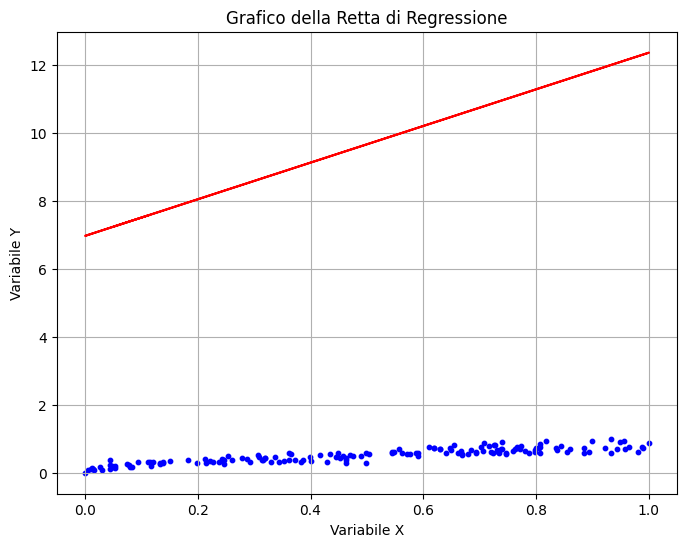

[[1.33250329]] -0.12573009733225046
Epoch 200: m = 1.3325, q = -0.1257


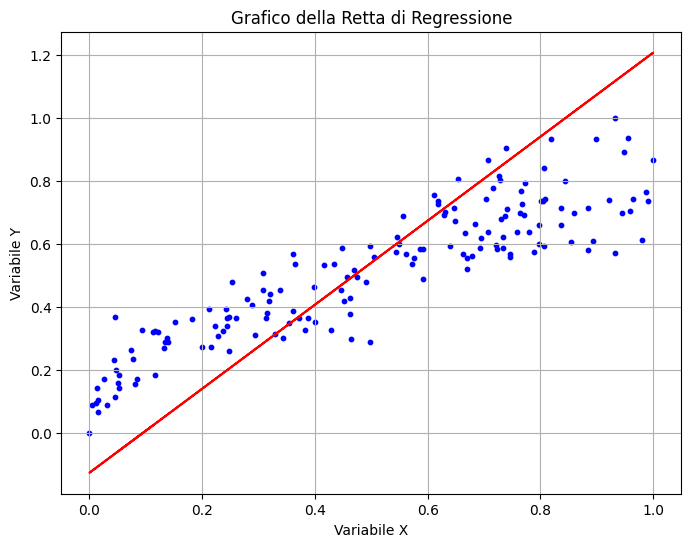

[[1.1606994]] -0.08782342714256872
Epoch 400: m = 1.1607, q = -0.0878


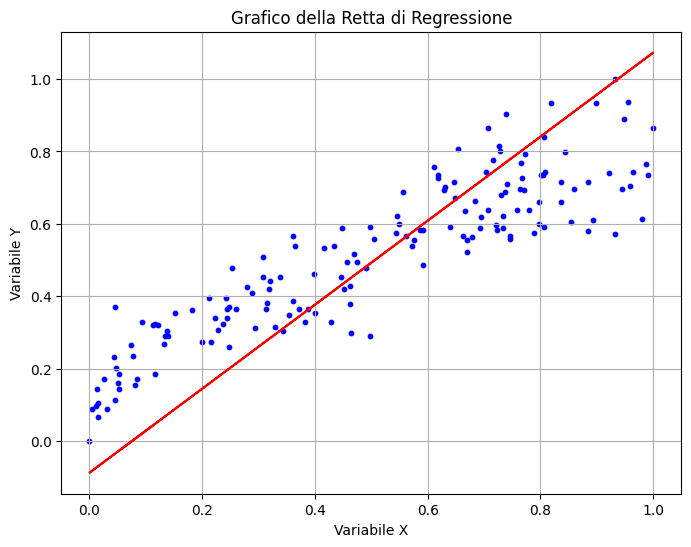

[[1.04607935]] -0.02665756671536538
Epoch 600: m = 1.0461, q = -0.0267


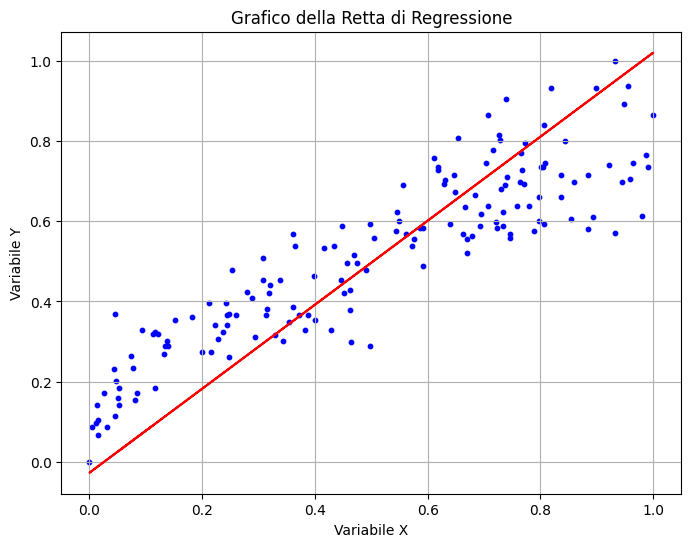

[[0.95823032]] 0.020463829462907934
Epoch 800: m = 0.9582, q = 0.0205


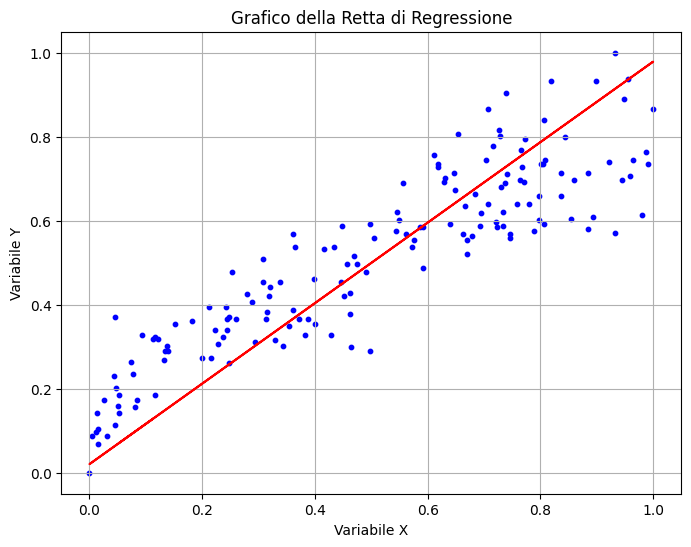

In [10]:
# itero l'algoritmo per il numero di epoche specificato
# calcolo la previsione, l'errore e aggiorno i parametri m e q
# per ogni epoca, calcolo il gradiente e aggiorno i parametri

for epoch in range(epochs):
  # calcolo la derivata della funzione di costo rispetto a m e q
  y_pred = m * X_train_norm + q
  error = y_pred - y_train_norm
  m_gradient = (2 / len(X_train_norm)) * np.dot(X_train_norm.T, error)
  q_gradient = (2 / len(X_train_norm)) * np.sum(error)
  
  #ricalcolo m e q usando il gradiente calcolato
  m -= learning_rate * m_gradient
  q -= learning_rate * q_gradient
  if(epoch % 200 == 0):
    # ogni 200 epoche vedo come si è evoluta la situazione
    print(m, q)
    print(f'Epoch {epoch}: m = {m[0][0]:.4f}, q = {q:.4f}')
    plot_regression(X_train_norm, y_train_norm, m[0][0], q)

In [11]:
# prendo i valori di m e q finali e testo la retta sia su X_train che su X_test
# valutando i risultati sia con la precision che 

In [12]:
calculate_y_true = lambda x,m,q: (m * x + q)

In [13]:
y_train_pred = calculate_y_true(X_train_norm, m[0][0], q)
y_test_pred = calculate_y_true(X_test_norm, m[0][0], q)

In [14]:
calculate_mse = lambda y_true, y_pred: np.mean((y_true - y_pred) ** 2)

il coefficiente di indeterminazione è dato da 1 - (varianza_totale/varianza_y_true )

In [ ]:
r2_score = lambda y_true, y_pred: 1 - (np.var(y_true - y_pred) / np.var(y_true))

In [15]:
mse_train = calculate_mse(y_train_norm, y_train_pred)
mse_test = calculate_mse(y_test_norm, y_test_pred)

print(f'MSE Train: {mse_train:.4f}')
print(f'MSE Test: {mse_test:.4f}')

MSE Train: 0.0128
MSE Test: 0.0141


questi valori sono molto bassi, il che indica che il modello ha un errore medio abbastanza contenuto

In [18]:
# calcolo il coefficiente di determinazione (R^2) per valutare la bontà della regressione
r2_train = r2_score(y_train_norm, y_train_pred)
r2_test = r2_score(y_test_norm, y_test_pred)

print(f'R^2 Train: {r2_train:.4f}')
print(f'R^2 Test: {r2_test:.4f}')

R^2 Train: 0.7219
R^2 Test: 0.7611


Questi valori sono molto buoni, il che vuol dire che il modello riesce a spiegare un 72% della varianza in train, mentre un 76% della varianza in test

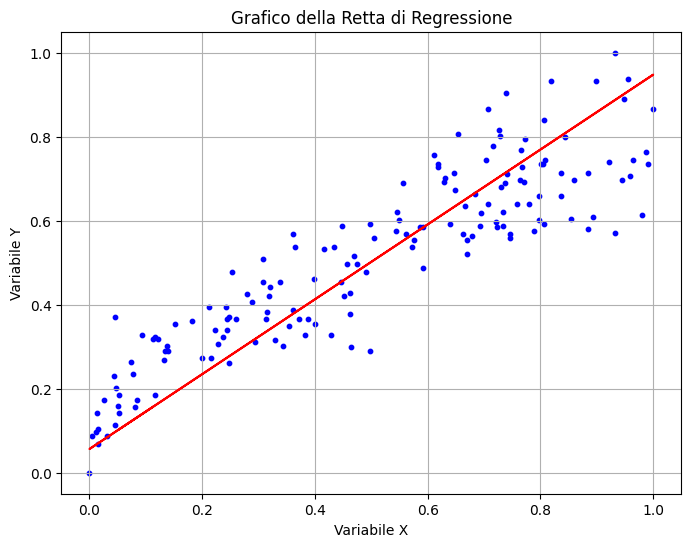

In [16]:
plot_regression(X_train_norm, y_train_norm, m[0][0], q)

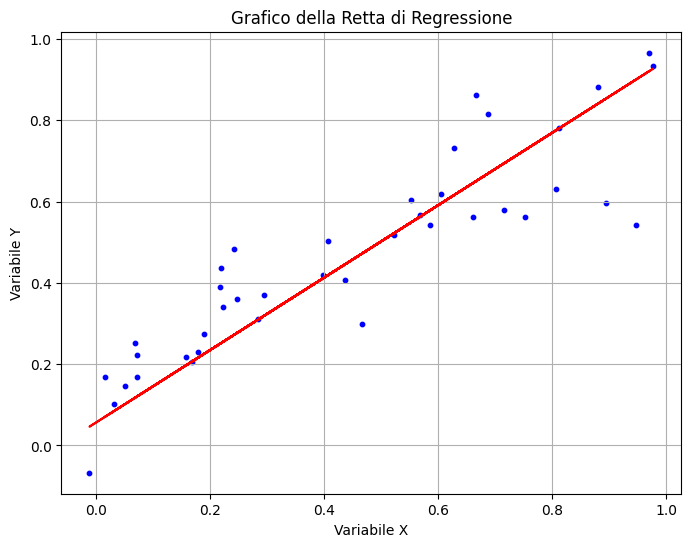

In [17]:
plot_regression(X_test_norm, y_test_norm, m[0][0], q)

il modello sembra infatti in grado di spiegare bene i dati